In [162]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [163]:
df = pd.read_csv("BloomingtonCycleRacingTeamMember2016Events.csv")

In [164]:
df.columns

Index(['DATE', 'TEAM MEMBER', 'EVENT', 'DISCIPLINE', 'CATEGORY/AGE GROUP',
       'COUNTS AS', 'PLACED', 'OUT OF',
       'NOTES (provide details for volunteer activity)'],
      dtype='object')

In [182]:
sns.set_style("white")
sns.set_palette("Set2", 8, .75)

In [217]:
plt.xkcd()

In [165]:
df.head()

,DATE,TEAM MEMBER,EVENT,DISCIPLINE,CATEGORY/AGE GROUP,COUNTS AS,PLACED,OUT OF,NOTES (provide details for volunteer activity)
0,4/17/16,Gerrit Sinclair,Illiniwek,Mountain,Cat 2,1.0,3,16,NaN
1,5/1/16,Gerrit Sinclair,Marilla,Mountain,Cat 2,1.0,1,9,NaN
2,5/22/16,Gerrit Sinclair,Jubilee,Mountain,Cat 2,1.0,1,13,NaN
3,6/12/16,Gerrit Sinclair,Spring Lake,Mountain,Cat 2,1.0,1,10,NaN
4,7/10/16,Gerrit Sinclair,Sunderbruch,Mountain,Cat 2,1.0,1,7,NaN


In [166]:
df = df.dropna(how='all')

In [167]:
df = df[df.DISCIPLINE != 'Volunteer']
df = df[df.DISCIPLINE != 'volunteer']


In [168]:
df.head(10)

,DATE,TEAM MEMBER,EVENT,DISCIPLINE,CATEGORY/AGE GROUP,COUNTS AS,PLACED,OUT OF,NOTES (provide details for volunteer activity)
0,4/17/16,Gerrit Sinclair,Illiniwek,Mountain,Cat 2,1.0,3,16,NaN
1,5/1/16,Gerrit Sinclair,Marilla,Mountain,Cat 2,1.0,1,9,NaN
2,5/22/16,Gerrit Sinclair,Jubilee,Mountain,Cat 2,1.0,1,13,NaN
3,6/12/16,Gerrit Sinclair,Spring Lake,Mountain,Cat 2,1.0,1,10,NaN
4,7/10/16,Gerrit Sinclair,Sunderbruch,Mountain,Cat 2,1.0,1,7,NaN
5,7/31/16,Gerrit Sinclair,Wildlife,Mountain,Cat 2,1.0,1,9,NaN
6,8/21/16,Gerrit Sinclair,Kickapoo,Mountain,Cat 2,1.0,3,10,NaN
7,9/4/16,Gerrit Sinclair,"Mud, Sweat & Gears",Mountain,Cat 2,1.0,1,10,NaN
8,9/11/16,Gerrit Sinclair,Farmdale,Mountain,Cat 2,1.0,1,10,Earned the 40-49 State Champ Jersey for Cat 2!
9,9/18/16,Gerrit Sinclair,Patriot CX,Cross,40+,1.0,1,10,NaN


In [169]:
# how many total races?
df.shape[0]

418

In [292]:
len(df['TEAM MEMBER'].unique())

48

In [170]:
def clean_placed(x):
    try:
        return int(x)
    except:
        return np.nan

df.PLACED = df.PLACED.map(clean_placed)

In [171]:
# who won the most races?
df[df.PLACED == 1]['TEAM MEMBER'].value_counts()

Gerrit Sinclair    8
Ashley Moore       7
Tom Keller         6
Aaron Fader        6
Aimee Dziekan      5
Lisa Becharas      2
Jane Smith         2
Kevin Gann         2
Chris Sweet        1
Beth Billing       1
Robert Clark       1
Mark Tank          1
Jon Kiner          1
Chris Daniels      1
Janet Moore        1
Kelly Ruiter       1
Name: TEAM MEMBER, dtype: int64

In [172]:
# who got the most second place finishs?
df[df.PLACED == 2]['TEAM MEMBER'].value_counts()



Aaron Fader       4
Mark Fetzer       4
Aimee Dziekan     3
Mark Tank         2
Janet Moore       1
Don Fogler        1
Bryce Walters     1
Chris Daniels     1
Damon Dusin       1
Kelly Ruiter      1
Tim Larsen        1
Tony Kerr         1
Michael Melick    1
Lisa Becharas     1
Ashley Moore      1
Mick Hannah       1
Tom Keller        1
Robert Clark      1
Lance Benedict    1
Kevin Gann        1
Name: TEAM MEMBER, dtype: int64

In [173]:
# who got the most third place finishs?
df[df.PLACED == 3]['TEAM MEMBER'].value_counts()

Bryce Walters      4
Kevin Gann         2
Aaron Fader        2
Mark Tank          2
Gerrit Sinclair    2
Jane Smith         2
Mark Fetzer        2
Lisa Becharas      2
Janet Moore        1
Tony Kerr          1
Robert Clark       1
Ashley Moore       1
Jon Kiner          1
Nathan Shaw        1
Matt Jarrett       1
Tom Keller         1
Brad Reid          1
Name: TEAM MEMBER, dtype: int64

In [174]:
# total podiums

df[(df.PLACED > 0) & (df.PLACED <4) ]['TEAM MEMBER'].value_counts()


Aaron Fader        12
Gerrit Sinclair    10
Ashley Moore        9
Tom Keller          8
Aimee Dziekan       8
Mark Fetzer         6
Kevin Gann          5
Bryce Walters       5
Lisa Becharas       5
Mark Tank           5
Jane Smith          4
Janet Moore         3
Robert Clark        3
Tony Kerr           2
Kelly Ruiter        2
Jon Kiner           2
Chris Daniels       2
Damon Dusin         1
Michael Melick      1
Chris Sweet         1
Nathan Shaw         1
Mick Hannah         1
Beth Billing        1
Brad Reid           1
Tim Larsen          1
Matt Jarrett        1
Lance Benedict      1
Don Fogler          1
Name: TEAM MEMBER, dtype: int64

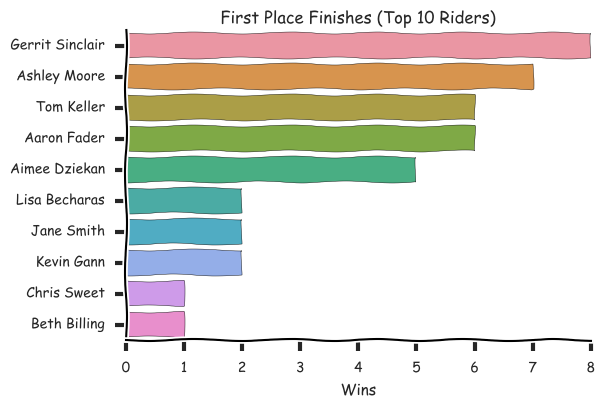

In [285]:
winner = df[(df.PLACED ==1) ]['TEAM MEMBER'].value_counts()[0:10]
plt.title("First Place Finishes (Top 10 Riders)")
plt.xlabel("Wins")
sns.barplot(x=winner.values, y = winner.index )
sns.despine()

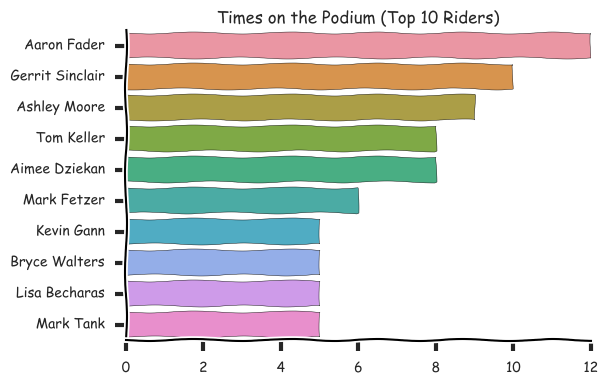

In [220]:
top_podium = df[(df.PLACED > 0) & (df.PLACED <4) ]['TEAM MEMBER'].value_counts()[0:10]
plt.title("Times on the Podium (Top 10 Riders)")
sns.barplot(x=top_podium.values, y = top_podium.index )
sns.despine()

In [221]:
df.DISCIPLINE.value_counts()

Mountain    150
Road        120
Cross        79
Tri          57
Gravel        5
TT            4
Other         2
Name: DISCIPLINE, dtype: int64

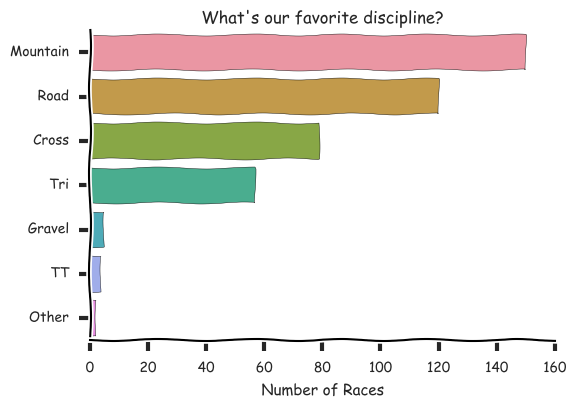

In [284]:
discipline_vc = df.DISCIPLINE.value_counts()
plt.title("What's our favorite discipline?")
plt.xlabel("Number of Races")
sns.barplot(y=discipline_vc.index, x = discipline_vc.values )
sns.despine()

In [223]:
# who wins more - Roadies or DirtBags

In [224]:
# roadies
total_road_races = df[df.DISCIPLINE == 'Road'].shape[0]
total_road_podiums = df[(df.DISCIPLINE == 'Road') & (df.PLACED > 0) & (df.PLACED <4)].shape[0]
road_podium_percent = total_road_podiums / total_road_races

#dirtbags
total_dirt_races = df[df.DISCIPLINE == 'Mountain'].shape[0]
total_dirt_podiums = df[(df.DISCIPLINE == 'Mountain') & (df.PLACED > 0) & (df.PLACED <4)].shape[0]
dirt_podium_percent = total_dirt_podiums / total_dirt_races

#cx
total_cx_races = df[df.DISCIPLINE == 'Cross'].shape[0]
total_cx_podiums = df[(df.DISCIPLINE == 'Cross') & (df.PLACED > 0) & (df.PLACED <4)].shape[0]
cx_podium_percent = total_cx_podiums / total_cx_races

#tri
total_tri_races = df[df.DISCIPLINE == 'Tri'].shape[0]
total_tri_podiums = df[(df.DISCIPLINE == 'Tri') & (df.PLACED > 0) & (df.PLACED <4)].shape[0]
tri_podium_percent = total_tri_podiums / total_tri_races

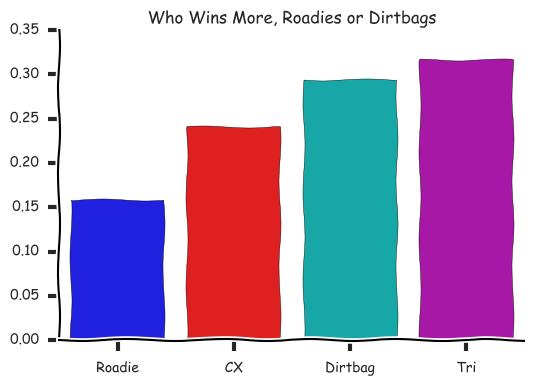

In [282]:
cats=['Roadie', 'CX', 'Dirtbag', 'Tri']
win_perct=[road_podium_percent, cx_podium_percent, dirt_podium_percent, tri_podium_percent]

plt.title("Who Wins More, Roadies or Dirtbags")
sns.barplot(x=cats, y = win_perct )
sns.despine()

In [253]:
# are old guys faster?

In [272]:
df_old = df[df['CATEGORY/AGE GROUP'].str.contains('Masters', na=False) ]

In [273]:
df_not = df[df['CATEGORY/AGE GROUP'].str.contains('Cat 5')| df['CATEGORY/AGE GROUP'].str.contains('Cat 4')
           |df['CATEGORY/AGE GROUP'].str.contains('Cat 3') | df['CATEGORY/AGE GROUP'].str.contains('Cat 2') |
           df['CATEGORY/AGE GROUP'].str.contains('Cat 1')]

In [274]:
df_not_podium = df_not[(df_not.PLACED > 0) & (df_not.PLACED <4)].shape[0]
df_not_races = df_not.shape[0]
df_not_podium_prct = df_not_podium / df_not_races

In [276]:
df_old_podium = df_old[(df_old.PLACED > 0) & (df_old.PLACED <4)].shape[0]
df_old_races = df_old.shape[0]
df_old_podium_prct = df_old_podium / df_old_races

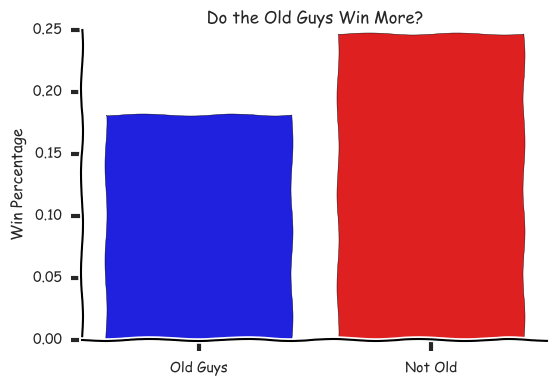

In [281]:
cats=['Old Guys', 'Not Old']
win_perct=[df_old_podium_prct, df_not_podium_prct]

plt.title("Do the Old Guys Win More?")
plt.ylabel("Win Percentage")
sns.barplot(x=cats, y = win_perct )
sns.despine()

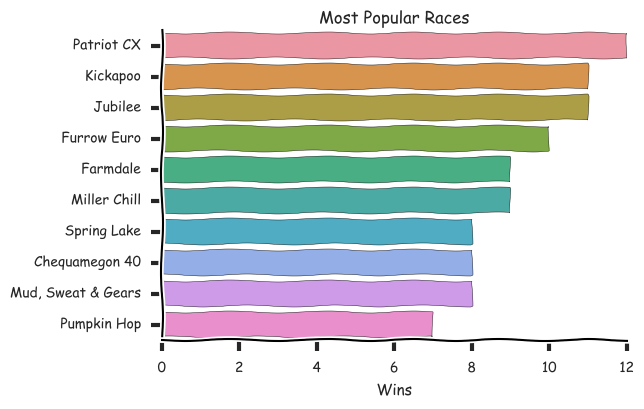

In [289]:
events = df.EVENT.value_counts()[0:10]
plt.title("Most Popular Races")
plt.xlabel("Wins")
sns.barplot(x=events.values, y = events.index )
sns.despine()
